In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/airline-passenger/airline_passengers.csv


In [2]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime

In [3]:
df = pdr.get_data_yahoo('TSLA')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-09-08,23.318666,22.820000,23.266001,22.893333,48952500.0,22.893333
2017-09-11,24.247334,23.333332,23.423332,24.246000,115006500.0,24.246000
2017-09-12,24.584000,24.026667,24.299334,24.183332,89593500.0,24.183332
2017-09-13,24.538000,23.972668,24.254667,24.415333,62778000.0,24.415333
2017-09-14,25.197332,24.175333,24.288668,25.176001,108037500.0,25.176001
...,...,...,...,...,...,...
2022-08-31,281.250000,271.809998,280.619995,275.609985,52107300.0,275.609985
2022-09-01,277.579987,266.149994,272.579987,277.160004,54287000.0,277.160004
2022-09-02,282.350006,269.079987,281.070007,270.209991,50752200.0,270.209991


**Simple Moving Average**

<AxesSubplot:xlabel='Date'>

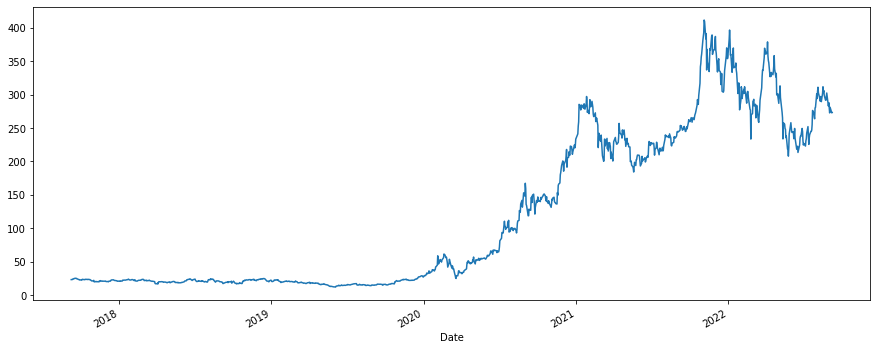

In [4]:
df['Open'].plot(figsize=(15,6))

<AxesSubplot:xlabel='Date'>

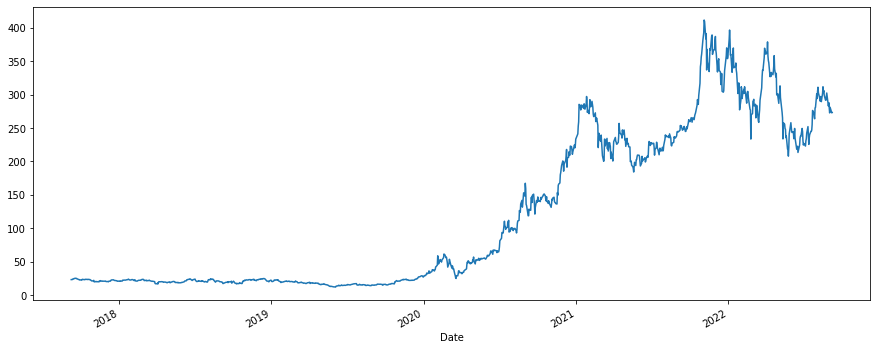

In [5]:
df.Open.plot(figsize=(15,6))

In [6]:
df['Open : 10 days rolling'] = df['Open'].rolling(window=10, min_periods=1).mean()

<AxesSubplot:xlabel='Date'>

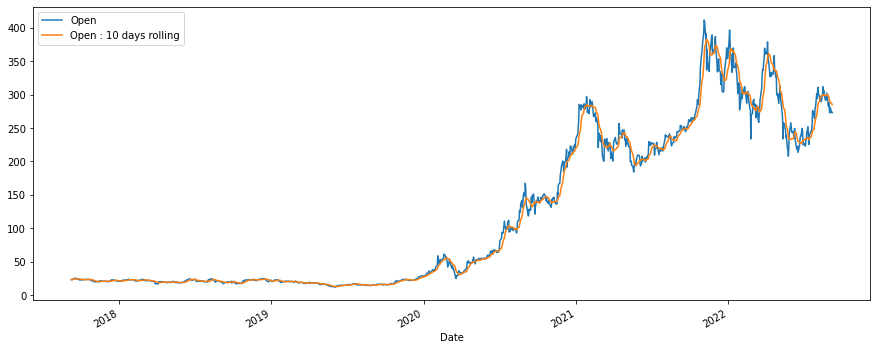

In [7]:
df[['Open','Open : 10 days rolling']].plot(figsize=(15,6))

<AxesSubplot:xlabel='Date'>

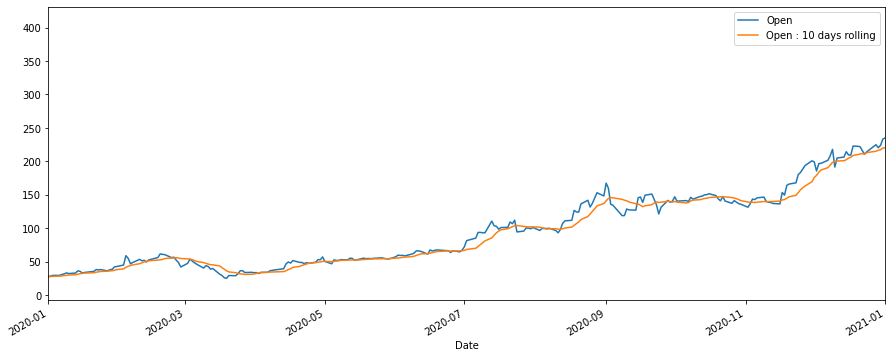

In [8]:
df[['Open','Open : 10 days rolling']].plot(xlim =['2020-01-01','2021-01-01'],figsize=(15,6))

<AxesSubplot:xlabel='Date'>

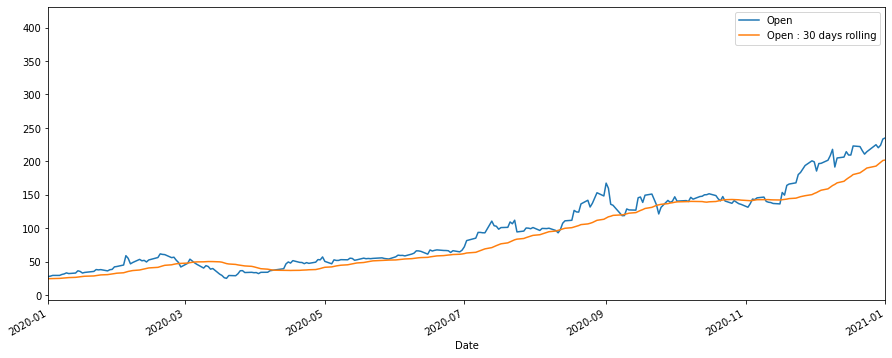

In [9]:
df['Open : 30 days rolling'] = df['Open'].rolling(window=30, min_periods=1).mean()
df[['Open','Open : 30 days rolling']].plot(xlim =['2020-01-01','2021-01-01'],figsize=(15,6))

<AxesSubplot:xlabel='Date'>

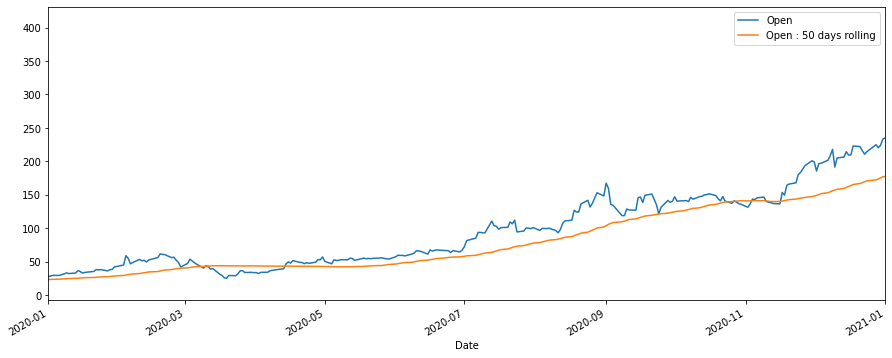

In [10]:
df['Open : 50 days rolling'] = df['Open'].rolling(window=50, min_periods=1).mean()
df[['Open','Open : 50 days rolling']].plot(xlim =['2020-01-01','2021-01-01'],figsize=(15,6))

<AxesSubplot:xlabel='Date'>

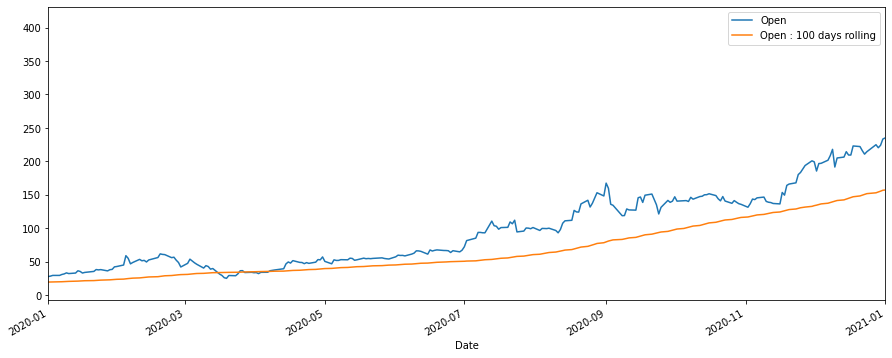

In [11]:
df['Open : 100 days rolling'] = df['Open'].rolling(window=100, min_periods=1).mean()
df[['Open','Open : 100 days rolling']].plot(xlim =['2020-01-01','2021-01-01'],figsize=(15,6))

<AxesSubplot:xlabel='Date'>

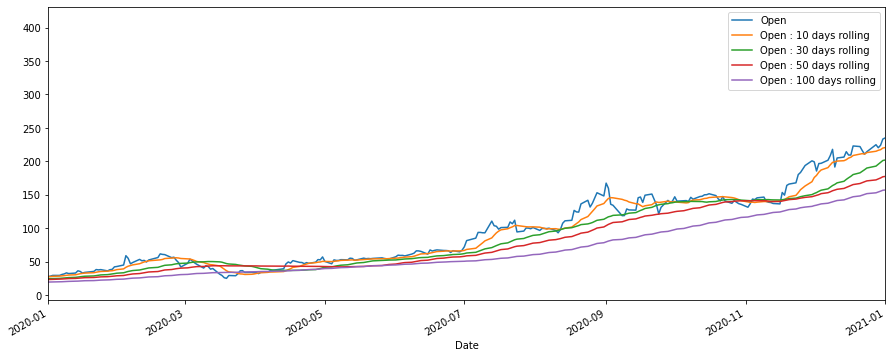

In [12]:
df[['Open','Open : 10 days rolling','Open : 30 days rolling','Open : 50 days rolling','Open : 100 days rolling'
   ]].plot(xlim =['2020-01-01','2021-01-01'],figsize=(15,6))

**Cummulative Moving Average (CMA)**

<AxesSubplot:xlabel='Date'>

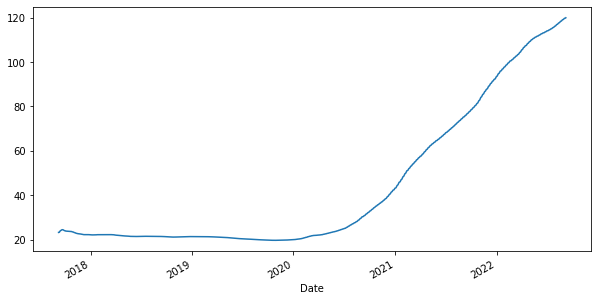

In [13]:
## Expanding
df['Open'].expanding().mean().plot(figsize =(10,5))

**Expotential weighted moving average (EWMA)**

<AxesSubplot:xlabel='Date'>

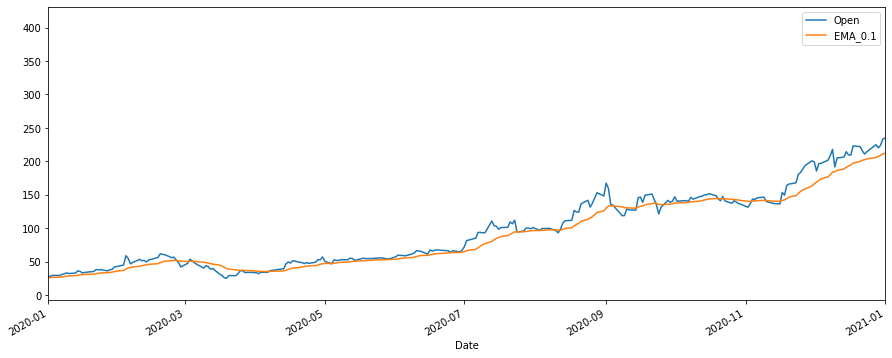

In [14]:
# Here alpha is the smoothing factor

df['EMA_0.1'] = df['Open'].ewm(alpha = 0.1, adjust =False).mean()
df[['Open','EMA_0.1']].plot(xlim =['2020-01-01','2021-01-01'],figsize=(15,6))

<AxesSubplot:xlabel='Date'>

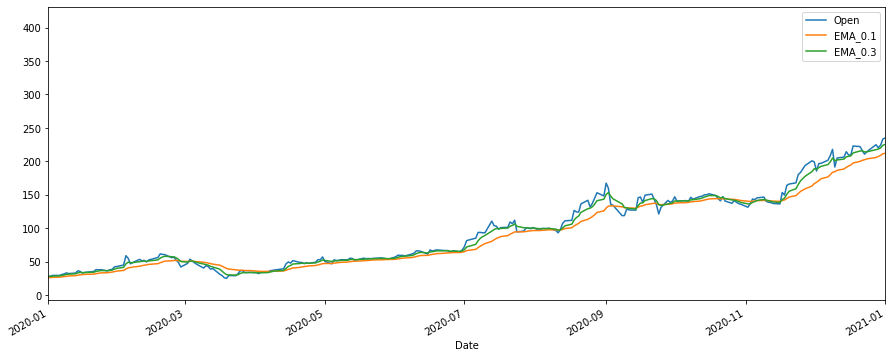

In [15]:
df['EMA_0.3'] = df['Open'].ewm(alpha = 0.3, adjust =False).mean()
df[['Open','EMA_0.1','EMA_0.3']].plot(xlim =['2020-01-01','2021-01-01'],figsize=(15,6))

<AxesSubplot:xlabel='Date'>

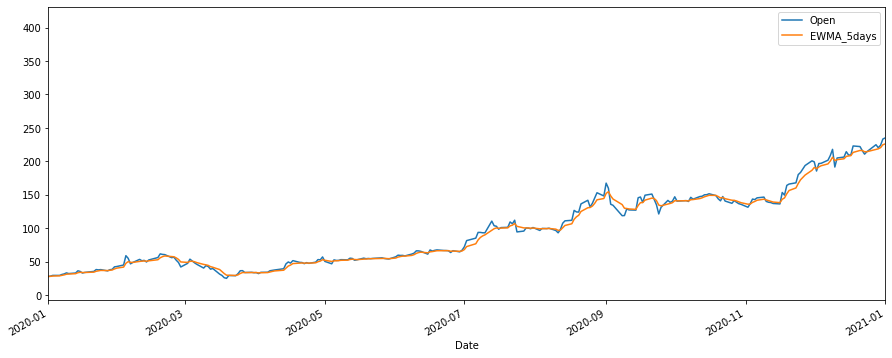

In [16]:
# Here span is the smoothing factor in EWMA

df['EWMA_5days'] = df['Open'].ewm(span=5, adjust =False).mean()
df[['Open','EWMA_5days']].plot(xlim =['2020-01-01','2021-01-01'],figsize=(15,6))

<AxesSubplot:xlabel='Date'>

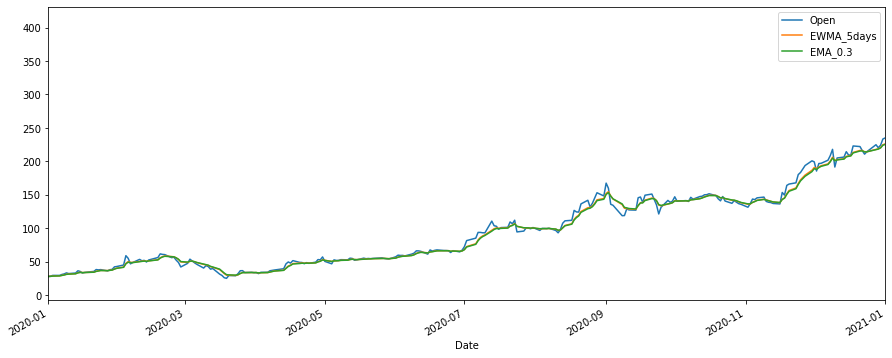

In [17]:
df[['Open','EWMA_5days','EMA_0.3']].plot(xlim =['2020-01-01','2021-01-01'],figsize=(15,6))